# Connecting content with JupyterHub and Binder

Because Jupyter Books are built with Jupyter Notebooks, you can connect your online
book with a Jupyter kernel running in the cloud. This lets readers quickly interact
with your content in a traditional coding interface using either JupyterHub or BinderHub.
This page describes a few ways to accomplish this.

## Creating interact buttons for BinderHub

BinderHub can be used to build the environment needed to run a repository, and provides
a link that lets others interact with that repository. If your Jupyter Book is hosted online
on GitHub, you can automatically insert buttons that link to the Jupyter Notebook running in a BinderHub.
When a user clicks the button, they'll be taken to a live version of the page. If your code
doesn't require a significant amount of CPU or RAM, you can use the free, public BinderHub running
at https://mybinder.org.

To automatically include Binder link buttons in each page of your Jupyter Book, use the following
configuration:

```yaml
# Binder link settings
use_binder_button                : true  # If 'true', add a binder button for interactive links
```

In addition, you can configure the components of your Binder links, which control things like
where your BinderHub exists, which repository is used to define the environment, etc. Here's
an example configuration with some explanation of each field.

```yaml
binderhub_url                    : "https://mybinder.org"  # The URL for your BinderHub.
binder_repo_base                 : "https://github.com/"  # The site on which the textbook repository is hosted
binder_repo_org                  : "jupyter"  # The username or organization that owns this repository
binder_repo_name                 : "jupyter-book"  # The name of the repository on the web
binder_repo_branch               : "master"  # The branch on which your textbook is hosted.
binderhub_interact_text          : "Interact"  # The text that interact buttons will contain.
```

## Creating interact buttons for JupyterHub

JupyterHub lets you host an online service that gives users their own Jupyter servers
with an environment that you specify for them. It allows you to give users access to
resources and hardware that you provision in the cloud, and allows you to authenticate users
in order to control who has access to your hardware.

Similar to Binder link buttons, you can also automatically include interact links that send
your readers to a JupyterHub that is running a live, interactive version of your page. This
is accomplished using the [nbgitpuller](https://github.com/jupyterhub/nbgitpuller) server
extension.

```yaml
use_jupyterhub_button            : false  # If 'true', display a button that will direct users to a JupyterHub (that you provide)
```

You can configure the location of the JupyterHub (which you may set up on your own using a guide
such as [zero to jupyterhub for kubernetes](https://z2jh.jupyter.org) or [the littlest jupyterhub](https://tljh.jupyter.org)) with the following configuration.

```yaml
jupyterhub_url                   : ""  # The URL for your JupyterHub.
```

## Instantly making your book page interactive with thebelab (beta)

If you'd like to provide interactivity for your content without making your readers
leave the Jupyter Book site, you can use a project called [Thebelab](https://github.com/minrk/thebelab).

This provides you a button that, when clicked, will convert each code cell into
an **interactive** cell that can be edited. It also adds a "run" button to each cell,
and connects to a Binder kernel running in the cloud.

To add a Thebelab button to your Jupyter Book pages, use the following configuration:

```yaml
use_thebelab_button              : true  # If 'true', display a button to allow in-page running code cells with Thebelab
```

In addition, you can configure the Binder settings that are used to provide a kernel for
Thebelab to run the code. These use the same configuration fields as the BinderHub interact
buttons described above.

For an example, click the **Thebelab** button above on this page, and run the code below.

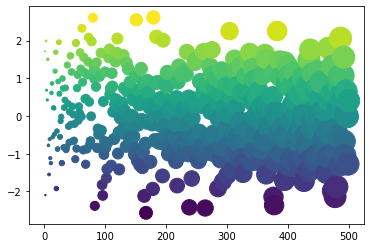

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.ion()

x = np.arange(500)
y = np.random.randn(500)

fig, ax = plt.subplots()
ax.scatter(x, y, c=y, s=x)

## Letting users define their own JupyterHub location

If you use interact links with your Jupyter Book, you can also allow users to update
these links to their own JupyterHub location by using parameters specified in the URL.
If an interact button is present on a page, append the following to a page's URL in order
to update where the link points:

```
mybook.com/mypage?jupyterhub=myhuburl.com
```

You should see a message displayed next to the interact link that lets the user know
where the link now points. This can be useful if you'd like to share content but allow
users to run this content wherever they like.